# ML 분반 Week3 (Classification) 과제
## 제출자: 최주희

# Red Wine Quality Classification

## 데이터 소개

UCI Machine Learning

TASK : Red wine Classification

csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



In [2]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [3]:
# loading data ,your own file path
df = pd.read_csv('ML_week3_HW_datasets/winequality-red.csv', sep=';')

## EDA(Exploratory Data Analysis)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오. (**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (**string**) values. The dataset consists of (**1599**) rows and (**12**) columns. The data type of all variables are (**numeric**).



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [7]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하세요. sum()을 2번 사용하시오.

print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


## Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' : 왼쪽으로 skewed된 정규분포.
2. 'volatile_acidity' : 중앙값이 0.5인 가운데가 조금 들어간 정규분포.
3. 'citric_acid' : 왼쪽으로 skewed된 분포.

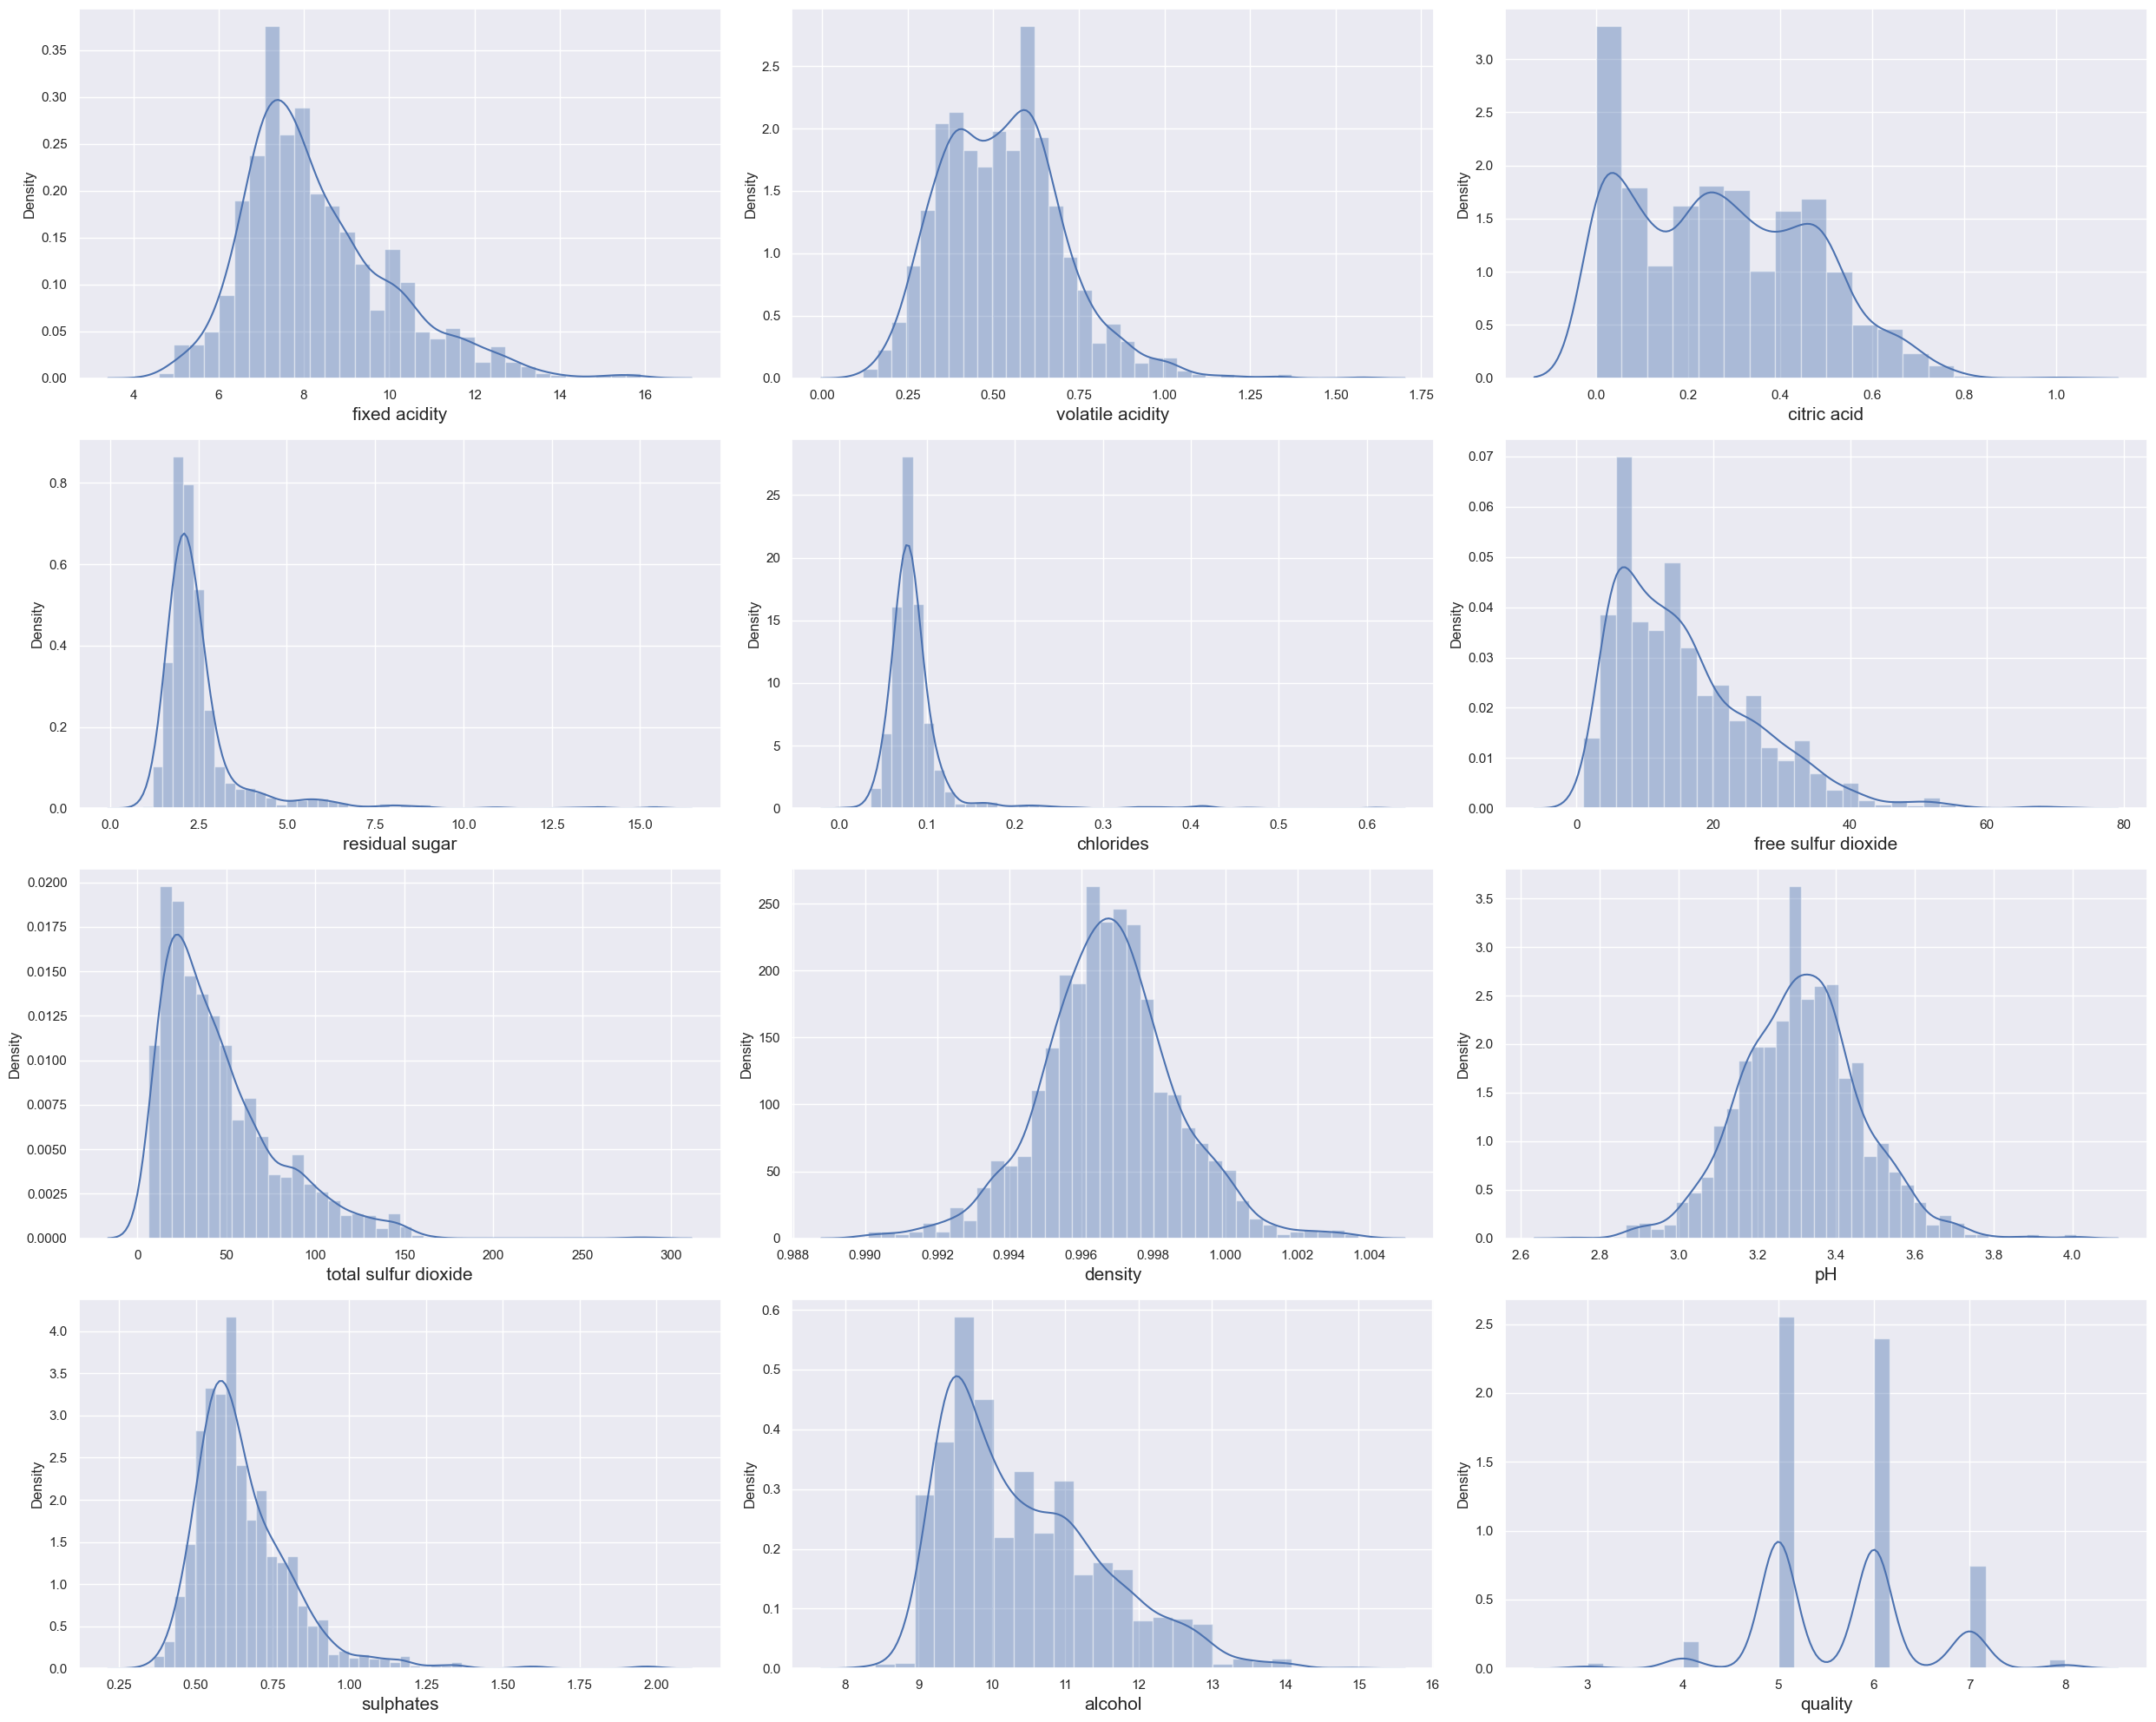

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

**더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 있는지 예를 들어 기술하시오.**

답: fixed acidity는 citric acid와 산성도인 pH와 절댓값 0.6 이상의 높은 상관관계를 가진다. 모두 산의 정도를 측정하는 변수이기 때문에 상관관계가 높다. colatile acidity의 경우에는 휘발성의, 변하는 값이기 때문에 상대적으로 상관관계가 작다. 

또한 free sulfur dioxide와 total sulfur dioxide 간의 상관관계도 0.67로 높다. 둘다 같은 sulfur dioxide(아황산가스)와 관련된 변수이기 때문에 마찬가지로 상관관계가 높은 것이다.

이처럼 변수 간의 관련성이 높은 변수들의 경우 상관관계가 높게 나타나는데 모든 변수를 사용하게 된다면 오히려 지도학습에 있어 성능을 떨어뜨리는 행위다. 다중공선성이 높은 문제를 해결하기 위해서는 관련된 변수들 중 하나를 제거하는 등의 조치가 필요하다. 


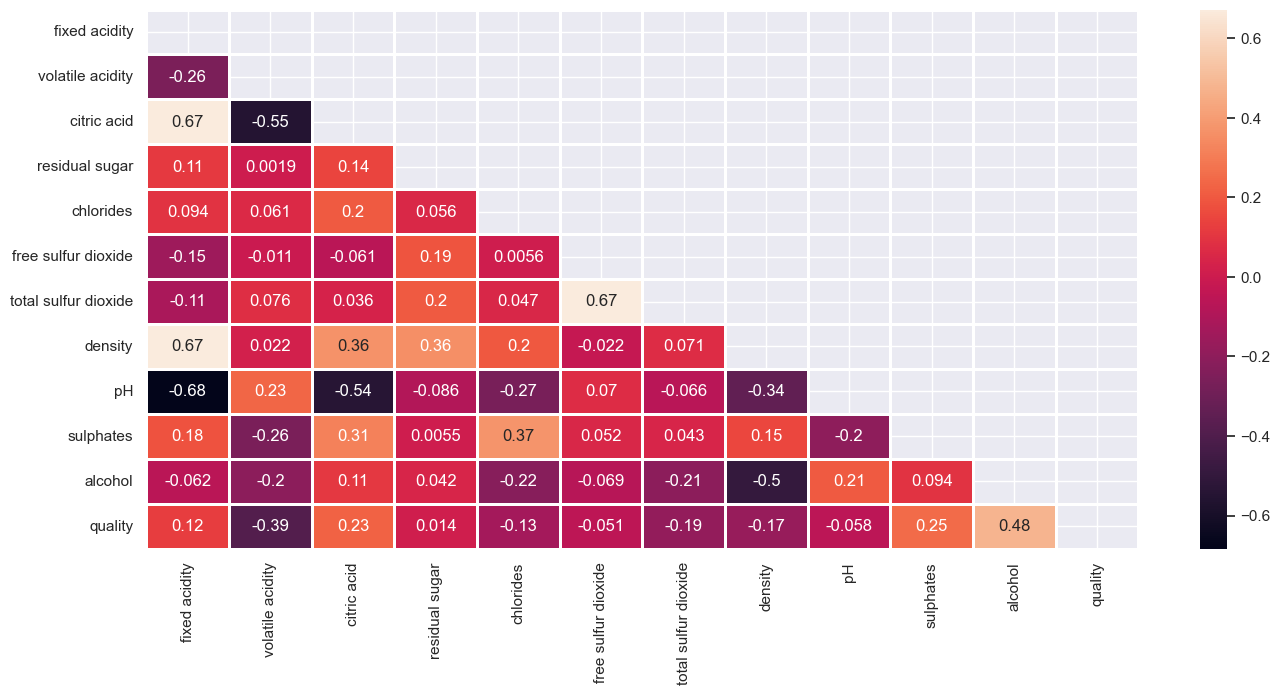

In [9]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [10]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.4961797702417017), pvalue=np.float64(3.938835339988381e-100))
Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6676664504810216), pvalue=np.float64(6.404722954681827e-207))
Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.6829781945685313), pvalue=np.float64(4.06303403984401e-220))
Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.5419041447395097), pvalue=np.float64(1.0072013259114716e-122))
Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6680472921189737), pvalue=np.float64(3.0747470608597493e-207))


## Q5. Divide quality range into 2 parts
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [11]:
df["quality"] = df['quality'].apply(lambda x: 1 if 6<=x<=8 else 0)
##에 들어갈 코드를 작성하시오.
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [12]:
df.head().style.background_gradient(cmap = "Reds")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0


## Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [13]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오.

# we select independent variable
x = df.drop("quality", axis = 1) ##을 채우시오.

In [14]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

## Q7.왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요? 두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

답 : 
- minmaxscaler: 모든 피쳐가 정확하게 [0,1] 사이에 위치하도록 조정. (outlier에 민감) 
- standardscaler: 평균과 표준편차 사용. 평균이 0이고 분산이 1인 값으로 변환해줌. 

**여기서 더 중요한 개념은 표준화와 정규화의 차이점이다.**
- 표준화(standardization): 변수 각각 평균을 0, 분산을 1로 만들어주는 스케일링 기법. 가우시안 정규분포를 가진 값으로 변환됨. 

- 정규화(Normalization): 일반적으로 서로 다른 변수의 크기를 통일하기 위해 크기를 변환해주는 개념.

현재로써 필요한 건 모든 변수를 정규분포로 만드는 것이 아닌 정규화 과정을 통해 변수들을 동일한 크기 단위로 비교하는 것이기 때문에 **정규화** 과정이 필요하다. 따라서 **MinMaxScaler**를 사용해줘야 한다. 

In [15]:
# scaling data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

## Q7-5. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 : 학습 데이터로 fit한 스케일링 기준 정보로 마찬가지로 test 데이터에 적용시켜야 한다. 그렇지 않으면 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [16]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [17]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


## Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

In [18]:
##아래의 과정을 반복하시오.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#KNN

knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [20]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [21]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=np.int64(21), weights='distance')

In [22]:
from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accuracy

Accuracy: 0.8025


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



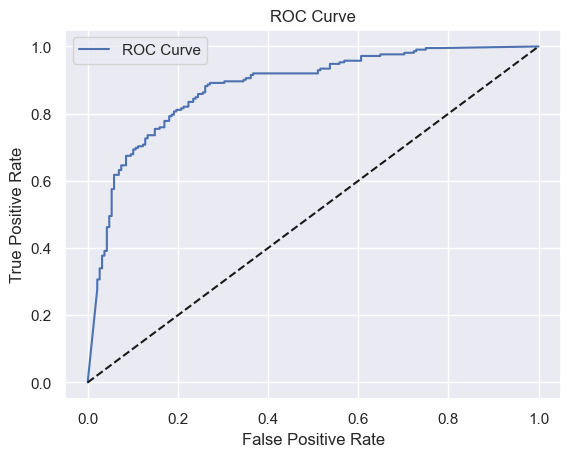

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
# Validation Set 에 대한 예측확률 계산
y_prob = knn_model.predict_proba(x_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7375


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt_clf = DecisionTreeClassifier()
parameters = {'max_depth': [1,2,3,4,5], 'min_samples_split':[2,3]}
grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=10)
grid_dt.fit(x_train, y_train)

scores_df = pd.DataFrame(grid_dt.cv_results_)

In [35]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001502,0.000927,0.000510,0.000277,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.708333,0.691667,0.633333,0.691667,0.683333,0.733333,0.708333,0.591667,0.658333,0.689076,0.678908,0.039056,7
1,0.000953,0.000048,0.000341,0.000049,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.708333,0.691667,0.633333,0.691667,0.683333,0.733333,0.708333,0.591667,0.658333,0.689076,0.678908,0.039056,7
2,0.001265,0.000050,0.000286,0.000012,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.708333,0.625000,0.633333,0.691667,0.683333,0.733333,0.708333,0.591667,0.658333,0.689076,0.672241,0.041896,9
3,0.001135,0.000036,0.000279,0.000054,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.708333,0.625000,0.633333,0.691667,0.683333,0.733333,0.708333,0.591667,0.658333,0.689076,0.672241,0.041896,9
4,0.001447,0.000040,0.000240,0.000010,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.691667,0.675000,0.675000,0.708333,0.700000,0.775000,0.683333,0.708333,0.650000,0.756303,0.702297,0.036025,5
5,0.001413,0.000051,0.000233,0.000017,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.691667,0.675000,0.675000,0.708333,0.700000,0.775000,0.683333,0.708333,0.650000,0.756303,0.702297,0.036025,5
6,0.001815,0.000050,0.000247,0.000027,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.725000,0.691667,0.675000,0.716667,0.700000,0.791667,0.766667,0.716667,0.725000,0.806723,0.731506,0.041001,2
7,0.001779,0.000020,0.000231,0.000004,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.725000,0.691667,0.675000,0.716667,0.700000,0.791667,0.766667,0.725000,0.725000,0.806723,0.732339,0.040775,1
8,0.002191,0.000029,0.000233,0.000005,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.733333,0.716667,0.691667,0.700000,0.683333,0.791667,0.800000,0.741667,0.683333,0.756303,0.729797,0.040551,4
9,0.002164,0.000017,0.000227,0.000003,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.725000,0.716667,0.691667,0.708333,0.691667,0.791667,0.800000,0.750000,0.683333,0.756303,0.731464,0.039449,3


In [34]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.7323


In [36]:
estimator = grid_dt.best_estimator_
y_pred = estimator.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7075


# 수고하셨습니다.